In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
IMAGE_SIZE = [224, 224]
train_path = 'Blind\\Data\\train'
valid_path = 'Blind\\Data\\validation'

In [6]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
for layer in mobilenet.layers:
    layer.trainable = False

In [9]:

x = Flatten()(mobilenet.output)

In [10]:
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=mobilenet.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,shuffle=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [82]:
training_set = train_datagen.flow_from_directory('D:\\Blind\\Data\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',shuffle=True)

Found 14550 images belonging to 3 classes.


In [83]:
test_set = test_datagen.flow_from_directory('D:\\Blind\\Data\\validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1020 images belonging to 3 classes.


In [84]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HOME\AppData\Local\Temp\ipykernel_13784\675562961.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
910/910 [==============================] - 541s 592ms/step - loss: 0.0278 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
910/910 [==============================] - 503s 552ms/step - loss: 0.0192 - accuracy: 0.9991 - val_loss: 2.6107e-05 - val_accuracy: 1.0000
Epoch 3/5
910/910 [==============================] - 503s 552ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.0579 - val_accuracy: 0.9980
Epoch 4/5
910/910 [==============================] - 512s 562ms/step - loss: 5.7352e-11 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9980
Epoch 5/5
910/910 [==============================] - 516s 567ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.0217 - val_accuracy: 0.9990


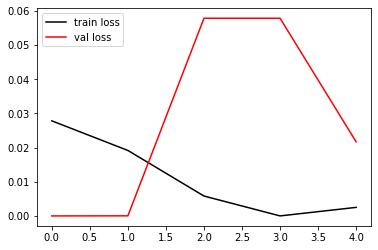

<Figure size 432x288 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="red")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




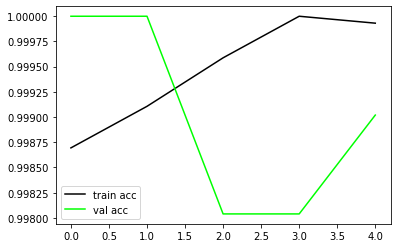

<Figure size 432x288 with 0 Axes>

In [88]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="lime")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [90]:
y_pred = model.predict(test_set)
y_pred

32/32 [==============================] - 27s 817ms/step


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [97]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 0, ..., 1, 1, 1], dtype=int64)

In [98]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('Blind\\Data\\model2.h5')


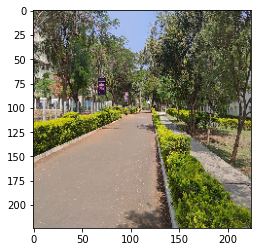

In [116]:
from matplotlib.pyplot import imshow
img=image.load_img('Blind\\Data\\test_img.jpg',target_size=(224,224))
x=image.img_to_array(img)
imshow(img)

In [119]:
import numpy as np
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [121]:
model.predict(img_data)

1/1 [==============================] - 0s 20ms/step
